In [1]:
import sys
sys.path.append('../../')

import estraces
import scared
from kresca.plot import CurvePlot
from kresca.attack import NonProfileAttack

## Import Traces

In [2]:
ths = estraces.read_ths_from_ets_file('../../Traces/AES_CW_5k.ets')

In [3]:
print(ths)

Trace Header Set:
Name.............: ETS Format THS
Reader...........: ETS format reader of file ../../Traces/AES_CW_5k.ets with 5000 traces.
key..............: uint8
plaintext........: uint8



## Plot Traces

RFBOutputContext()

CanvasBackend(css_height='500px', css_width='950px')
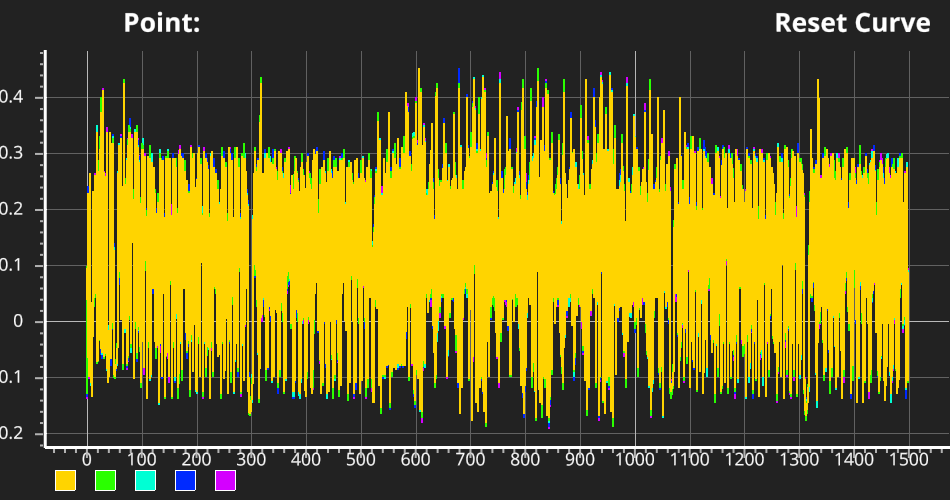

In [4]:
#put inline=True if you want to display on notebook
CurvePlot(ths.samples[:5], inline=True) 

## Make Selection Functions

In [11]:
first_addroundkey = scared.aes.selection_functions.encrypt.FirstAddRoundKey()
first_subbytes = scared.aes.selection_functions.encrypt.FirstSubBytes()
last_addroundkey = scared.aes.selection_functions.encrypt.LastAddRoundKey()
last_subbytes = scared.aes.selection_functions.encrypt.LastSubBytes()
last_deltaround = scared.aes.selection_functions.encrypt.DeltaRLastRounds()

In [6]:
AES_selection_functions = {
    'AES First Add Round Key': first_addroundkey,
    'AES First Sub Bytes': first_subbytes,
#     'AES Last Add Round Key': last_addroundkey,
#     'AES Last Sub Bytes': last_subbytes,
#     'AES Last Delta R': last_deltaround,
}

## Make Attack Object

In [7]:
attack = NonProfileAttack(
    ths=ths,
    selection_functions=AES_selection_functions
)

In [8]:
attack.run()

selection_function: AES First Add Round Key


  0%|          | 0/10 [00:00<?, ?it/s]

selection_function: AES First Sbox


  0%|          | 0/10 [00:00<?, ?it/s]

In [9]:
attack.report()

../..\kresca\attack\nonprofile.py:98: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df = df.applymap(lambda val: 'color: %s' % 'green', subset=found_list).set_precision(3)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Scores,0.677,0.643,0.600,0.561,0.667,0.635,0.617,0.554,0.671,0.625,0.611,0.553,0.678,0.622,0.607,0.551
Found Bytes,0x2b,0x81,0x15,0xe9,0x28,0xae,0xd2,0xa6,0x54,0x8,0x15,0x88,0x9,0xcf,0xb0,0x3c
Expected,0x2b,0x7e,0x15,0x16,0x28,0xae,0xd2,0xa6,0xab,0xf7,0x15,0x88,0x9,0xcf,0x4f,0x3c
Rank,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Scores,0.614,0.588,0.582,0.594,0.610,0.628,0.579,0.605,0.616,0.605,0.572,0.598,0.619,0.601,0.585,0.610
Found Bytes,0x2b,0x7e,0x15,0x16,0x28,0xae,0xd2,0xa6,0xab,0xf7,0x15,0x88,0x9,0xcf,0x4f,0x3c
Expected,0x2b,0x7e,0x15,0x16,0x28,0xae,0xd2,0xa6,0xab,0xf7,0x15,0x88,0x9,0xcf,0x4f,0x3c
Rank,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
attack.show_result()

===================================== AES First Add Round Key  =====================================


Output(layout=Layout(height='400px'))

========================================= AES First Sbox  ==========================================


Output(layout=Layout(height='400px'))